# **Chap7ÔºöBaggingÂíåÈöèÊú∫Ê£ÆÊûó**

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter
from copy import deepcopy
from tqdm import tqdm
import seaborn as sns
colors = sns.palettes.color_palette("muted")

Êé•‰∏ãÊù•ÁöÑÈÉ®ÂàÜÔºåÊàë‰ª¨Â∞Ü‰ªãÁªç**ÈõÜÊàêÊ®°Âûã**Ôºà**ensemble**ÔºâÔºå‰∏ªË¶ÅÂåÖÂê´‰∏§Á±ªÔºö**Bagging**Âíå**Boosting**

ÁÆÄÂçïÊù•ËØ¥ÔºåÈõÜÊàêÊ®°ÂûãÈÄöËøáÁªÑÂêàÂ§ö‰∏™**Âü∫Â≠¶‰π†Âô®**Ôºà**base estimator**ÔºâÊûÑÊàêÊúÄÁªàÁöÑÊ®°ÂûãÔºå**Âçï‰∏™Âü∫Â≠¶‰π†Âô®Â§ÑÁêÜÁõÆÊ†áÈóÆÈ¢òÁöÑËÉΩÂäõÂèØËÉΩÊúâÈôê„ÄÅÊàñËÄÖ‰∏çÁ®≥ÂÆö**Ôºå‰ΩÜÁªÑÂêàÂ§ö‰∏™Âü∫Â≠¶‰π†Âô®Â∞±ËÉΩÂèñÂæóÈùûÂ∏∏Â•ΩÁöÑÊïàÊûúÔºåËÄå**BaggingÂíåBoostingÂ∞±ÊòØ‰∏§Á±ªÁªÑÂêàÂü∫Â≠¶‰π†Âô®ÁöÑÊñπÊ≥ï**

Êú¨Á´†‰∏ªË¶Å‰ªãÁªç**Bagging**ÊñπÊ≥ïÁöÑÊÄùÊÉ≥ÔºåÂèäÂü∫‰∫éÂÜ≥Á≠ñÊ†ëÁöÑBaggingÊ®°Âûã**ÈöèÊú∫Ê£ÆÊûó**

## **1 BootstrapÂíåBagging**

### **1.1 Bootstrap**

BootstrapÊù•Ëá™‰∫é**Pull up by your own bootstrap**ÔºåÂç≥ÈÄöËøáÊãâÈù¥Â≠êÊääËá™Â∑±ÊèêËµ∑Êù•ÔºåÂêéÈù¢ÂØìÊÑèÂèëÁîüÊîπÂèòÔºåÁé∞Âú®ÈÄöÂ∏∏ÈöêÂñª**‰∏çÈúÄË¶ÅÂ§ñÁïåÂ∏ÆÂä©Ôºå‰ªÖ‰æùÈù†Ëá™Ë∫´ÂäõÈáèËÆ©Ëá™Â∑±ÂèòÂæóÊõ¥Â•Ω**ÔºåÂõ†Ê≠§BootstrapÂèàÁß∞‰∏∫**Ëá™Âä©Ê≥ï**

BootstrapÈÄö**ËøáÂØπÊ†∑Êú¨ÊúâÊîæÂõûÊäΩÊ†∑**ÁöÑÊñπÊ≥ïÊù•ÊûÑÈÄ†ÁªüËÆ°Ê®°ÂûãÔºåÊòØÁªüËÆ°Â≠¶‰∏≠Â∏∏Áî®ÁöÑ**ÈùûÂèÇÊï∞ÁªüËÆ°ÊñπÊ≥ï**ÔºåÁªüËÆ°Â≠¶‰∏≠Â∏∏**Áî®BootstrapËØÑ‰º∞ÁªüËÆ°ÂáÜÁ°ÆÊÄß**

Êàë‰ª¨Áî®‰∏ãÈù¢ÁöÑ‰∏Ä‰∏™ÁÆÄÂçï‰æãÂ≠êÔºåÊù•ËØ¥ÊòéBootstrapÁöÑ‰ΩúÁî®. ÂÅáËÆæÈöèÊú∫ÂèòÈáè $X\sim N(\mu,1)$ÔºåËøôÈáåÂÅáËÆæ $\mu=0$ÔºåÂÅáËÆæ $x_i,i=1,\cdots,N$ ÊòØÊù•Ëá™‰∫éÊÄª‰Ωì $X$ ÁöÑÁã¨Á´ãÊ†∑Êú¨

$$
x_i\sim N(0,1),\quad i=1,\cdots,N
$$

Êàë‰ª¨Âèñ $N = 50$ Êù•ÁîüÊàê‰∏ÄÁªÑÊ†∑Êú¨

In [2]:
# ÁîüÊàê 50 ‰∏™ N(0,1) ÁöÑÁã¨Á´ãÂêåÂàÜÂ∏ÉÊ†∑Êú¨
X = np.random.normal(0,1,50)

Êé•‰∏ãÊù•ÔºåËÄÉËôëÁî®ËøôÁªÑÊ†∑Êú¨Êù•**‰º∞ËÆ°ÊÄª‰ΩìÂùáÂÄº** $\mu$ÔºåÊúÄÂ∏∏Áî®ÁöÑ**Êó†ÂÅè‰º∞ËÆ°ÊòØÊ†∑Êú¨ÂùáÂÄº** $\overline{X}$Ôºö

$$
\hat{\mu} = \overline{X} = \frac{1}{N}\sum_{i=1}^{N}x_i
$$

In [3]:
# ‰ΩøÁî®Ê†∑Êú¨ÂùáÂÄº‰º∞ËÆ°ÊÄª‰ΩìÂùáÂÄº
print("‰º∞ËÆ°ÂæóÂà∞ÁöÑÊÄª‰ΩìÂùáÂÄº‰∏∫Ôºö%.4f"%(X.mean()))

‰º∞ËÆ°ÂæóÂà∞ÁöÑÊÄª‰ΩìÂùáÂÄº‰∏∫Ôºö0.0756


BootstrapÊñπÊ≥ïÂú®Â§ÑÁêÜËØ•ÈóÆÈ¢òÊó∂ÔºåÂÅáËÆæ**Ê†∑Êú¨Âç≥ÊòØ‰º™ÊÄª‰Ωì**ÔºåÁÑ∂ÂêéÈáçÂ§ç $B$ Ê¨°‰ªéËØ•‰º™ÊÄª‰Ωì‰∏≠ÊäΩÂèñÂÆπÈáè‰∏∫ $N$ ÁöÑÊ†∑Êú¨ $\{x_i^{(b)}\}_{i=1}^{N},b=1,\cdots,B$ÔºåÂæóÂà∞ $B$ ‰∏™Ê†∑Êú¨ÂùáÂÄº $\overline{X}^{(b)}$ÔºåÂú®ÂèñËøô $B$ ‰∏™Ê†∑Êú¨ÂùáÂÄºÁöÑËÅöÂêàÂæóÂà∞‰º∞ËÆ°ÈáèÔºö

$$
\hat{\mu} = \frac{1}{B}\sum_{b=1}^{B} \overline{x}^{(b)}
$$

È¶ñÂÖàÔºåÊàë‰ª¨ÂèØ‰ª•ÁªòÂà∂ÂíåÊûÑÈÄ†**ÁªèÈ™åÁ¥ØÁßØÂàÜÂ∏ÉÂáΩÊï∞** $\Psi(x)$

Text(0.5, 1.0, 'Empirical Cumulative Distribution Function')

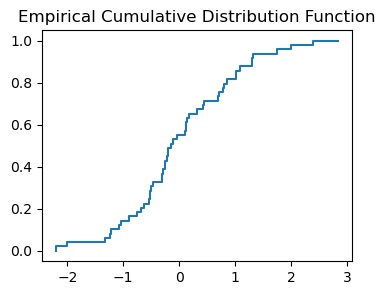

In [4]:
X = np.sort(X)
y = np.linspace(0,1,len(X))
fig = plt.figure(figsize=(4,3))
plt.step(X,y)
plt.title("Empirical Cumulative Distribution Function")

Âèñ‰∏äËø∞ÂáΩÊï∞ÁöÑ**ÂèçÂáΩÊï∞** $\Psi^{-1}(x)$ÔºåÂ∞±ÂèØ‰ª•Áî®‰∫éÊûÑÈÄ†‰º™ÊÄª‰Ωì‰∫ÜÔºåÊØèÊ¨°ÁîüÊàêÊ†∑Êú¨Êó∂ÔºåÂè™ÈúÄË¶ÅÂèñ $N$ ‰∏™Áã¨Á´ãÂêåÂàÜÂ∏ÉÁöÑÂùáÂåÄÂàÜÂ∏É $U[0,1]$ ÈöèÊú∫Êï∞ $x_i$Ôºå$\Psi^{-1}(x_i)$ Âç≥‰∏∫ÊâÄÊ±Ç

Text(0.5, 1.0, 'Inverse Empirical Cumulative Distribution Function')

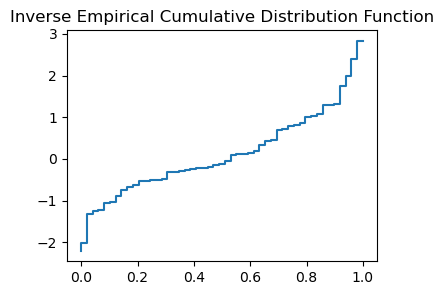

In [5]:
# ÁªòÂà∂ÂèçÂáΩÊï∞
fig = plt.figure(figsize=(4,3))
plt.step(y,X)
plt.title("Inverse Empirical Cumulative Distribution Function")

In [6]:
def inv_Psi(r, X):
    """
    Parameters
    ----------
    r : np.ndarray
        ÂùáÂåÄÂàÜÂ∏É U[0,1] ÁöÑÈöèÊú∫Êï∞
    X : np.ndarray
        ÁîüÊàê‰º™ÊÄª‰ΩìÁöÑÊ†∑Êú¨
    """
    # ÊéíÂ∫è
    X = sorted(X)
    index = np.int_(r*len(X))
    samples = [X[i] for i in index]
    return np.array(samples)

Êàë‰ª¨Âèñ $B = 200$ÔºåÊù•ÊûÑÈÄ†Êàë‰ª¨ÁöÑBootstrap‰º∞ËÆ°ÁªìÊûú

In [7]:
B = 300
mu = []
for b in range(B):
    R = np.random.rand(50)
    samples = inv_Psi(R,X)
    mu.append(samples.mean())
mu_hat = np.mean(mu)
print("Bootstrap‰º∞ËÆ°ÂæóÂà∞ÁöÑÊÄª‰ΩìÂùáÂÄº‰∏∫Ôºö%.4f"%(mu_hat))

Bootstrap‰º∞ËÆ°ÂæóÂà∞ÁöÑÊÄª‰ΩìÂùáÂÄº‰∏∫Ôºö0.0737


BootstrapËøòÂèØ‰ª•Â∏ÆÂä©Êàë‰ª¨ÁªòÂà∂**ÂùáÂÄº‰º∞ËÆ°ÈáèÁöÑÂàÜÂ∏É**

In [8]:
fig = plt.figure(figsize=(5,3))
plt.hist(mu,bins=10,color=colors[0])
plt.title("Distribution of Mean Estimator")
plt.vlines(X.mean(),0,100,color="red",ls="--",label="Samples Mean")
plt.vlines(mu_hat,0,100,color="black",label="Bootstrap")
plt.legend()

‰∏äÈù¢ÁöÑÁõ¥ÊñπÂõæÂèØ‰ª•ÁÆÄÂçïÁêÜËß£‰∏∫Ôºö
* ‰ªé**ÊÄª‰Ωì‰∏≠Â§öÊ¨°ÊäΩÊ†∑**Ôºå**Ê†∑Êú¨ÂùáÂÄºÁöÑ‰º∞ËÆ°ÈáèÂ≠òÂú®ÈöèÊú∫ÊÄß**ÔºåÂÖ∂ÂàÜÂ∏ÉÂ¶Ç‰∏äÂõæÊâÄÁ§∫
* BootstrapÈÄöËøáÂ§öÊ¨°ÊäΩÊ†∑ËÅöÂêàÁöÑÊñπÊ≥ïÔºå**Èôç‰Ωé‰º∞ËÆ°ÈáèÁöÑÊñπÂ∑Æ**Ôºå‰ΩøÂÖ∂ÊÄªÂ§Ñ‰∫é**‰º∞ËÆ°ÈáèÂàÜÂ∏ÉÁöÑ‰∏≠ÂøÉ**

Êàë‰ª¨ÂèØ‰ª•‰ªéÊï∞Â≠¶‰∏äÁÆÄÂçïÁêÜËß£‰∏äËø∞‰∫ãÂÆûÔºåËÆæÊúâÊ†∑Êú¨ $Z=(z_1,\cdots,z_n)$ÔºåÂÖ∂‰∏≠ $z_i = (x_i,y_i)$ Ë°®Á§∫Ê†∑Êú¨ÂØπÔºå$x_i$ ÊòØÁâπÂæÅÔºå$y_i$ ÊòØÊ†áÁ≠æÔºåÊàë‰ª¨ÊÑüÂÖ¥Ë∂£ÁöÑ‰º∞ËÆ°ÈáèÊòØ $S(Z)$ÔºåÊàë‰ª¨Âü∫‰∫éBootstrapÊñπÊ≥ï‰º∞ËÆ° $S(Z)$ ÁöÑÂàÜÂ∏ÉÔºåËøõËÄåÂæóÂà∞Áõ∏Â∫îÁöÑÂèÇÊï∞ÁöÑ‰º∞ËÆ°Ôºå‰æãÂ¶ÇËÄÉËôëÊñπÂ∑ÆÔºö

$$
\hat{\text{Var}}\left[ S(Z) \right] = \frac{1}{B-1} \sum_{b}^{B}\left( S(Z^{(b)}) - \overline{S}^* \right)
$$

ÂÖ∂‰∏≠Ôºå$Z^{(b)},b=1,\cdots,B$ ÊòØÁ¨¨ $b$ Ê¨°BootstrapÊäΩÊ†∑Ê†∑Êú¨ÈõÜÂêàÔºå$\overline{S}^*$ ÊòØËÅöÂêà‰º∞ËÆ°ÈáèÔºö

$$
\overline{S}^* = \frac{1}{B}\sum_{b=1}^{B} S(Z^{(b)})
$$

Êú¨Ë¥®‰∏äÔºå$\hat{\text{Var}}\left[ S(Z)\right]$ ÂèØ‰ª•ÂΩì‰Ωú $S(Z)$ ÊñπÂ∑ÆÁöÑ**ËíôÁâπÂç°Ê¥õ‰º∞ËÆ°**

ÂØπ‰∫é‰∏Ä‰∏™ÁªüËÆ°Â≠¶‰π†ÈóÆÈ¢òÔºåÂõûÈ°æÊ®°ÂûãÁöÑ**ÂÅèÂ∑ÆÊñπÂ∑ÆÂàÜËß£**ÔºåÊ®°Âûã $f$ ÁöÑ‰º∞ËÆ°ËØØÂ∑Æ $\text{err}$ ÂèØ‰ª•ÂàÜËß£‰∏∫Ôºö

$$
\text{err}(x) = bias^2(x) + var(x) + \varepsilon^2
$$

ÂõûÈ°æÂêÑÈ°πÁöÑÂê´‰πâÔºö

**(1) ÂÅèÂ∑ÆÈ°π $bias^2(x)$**  
ÂÅèÂ∑ÆÈÉ®ÂàÜ $bias^2(x)$ ÊòØ**Ê®°ÂûãÊúüÊúõÈ¢ÑÊµã‰∏éÁúüÂÆûÊ†áÁ≠æ**‰πãÈó¥ÁöÑÂ∑ÆË∑ùÔºåÈÄöËøáÂÆÉËÉΩÂà§Êñ≠Ôºö
* $bias^2(x)$ ÂàªÁîª**Ê®°ÂûãËá™Ë∫´ÁöÑÊãüÂêàËÉΩÂäõ**
* $bias^2(x)$ ÂàªÁîª**Ê®°ÂûãÁöÑÈ¢ÑÊµãÊòØÂê¶Âá∫Áé∞Á≥ªÁªüÊÄßÂÅèÂ∑Æ**

**(2) ÊñπÂ∑ÆÈ°π $var(x)$**  
ÊñπÂ∑ÆÈÉ®ÂàÜ $var(x)$ Â∫¶Èáè‰∫Ü**ËÆ≠ÁªÉÈõÜÂèòÂä®ÂØπÊ®°ÂûãÂ≠¶‰π†ÊÄßËÉΩÁöÑÂΩ±Âìç**ÔºåÈÄöËøáÂÆÉËÉΩÂà§Êñ≠Ôºö
* **Ê®°ÂûãÈù¢ÂØπÊï∞ÊçÆÊâ∞Âä®ÁöÑÂ∫îÂØπËÉΩÂäõ**ÔºåÊàñÁùÄËØ¥**ÂØπ‰∏çÂêåÂàÜÂ∏ÉÁöÑÊéåÊè°ËÉΩÂäõ**
* **Êï∞ÊçÆÂàÜÂ∏ÉÂèòÂåñÁªôÊ®°ÂûãÈ¢ÑÊµãÂ∏¶Êù•ÁöÑÂΩ±Âìç**

**(3) Âô™Â£∞È°π $\varepsilon^2$**  
Âô™Â£∞ÈÉ®ÂàÜ $\varepsilon^2$ Â∫¶Èáè‰∫Ü**Ê®°ÂûãÂú®ËØ•Êú∫Âô®Â≠¶‰π†‰ªªÂä°‰∏ãÈ¢ÑÊµãËØØÂ∑ÆËÉΩËææÂà∞ÁöÑ‰∏ãÁïå**ÔºåÂÆÉË°®Êòé‰∫ÜÔºö
* ËøôÊòØ**ËßÇÊµãÊ†áÁ≠æÂíåÁúüÂÆûÊ†áÁ≠æ‰πãÈó¥ÁöÑÁ≥ªÁªüÊÄßÂÅèÂ∑Æ**Ôºå**‰∏çÊòØÊ®°ÂûãËÉΩÂ§üËß£ÂÜ≥ÁöÑ**
* $\varepsilon^2$ ÂàªÁîª‰∫ÜËØ•**Êú∫Âô®Â≠¶‰π†ÈóÆÈ¢òÁöÑÈöæÂ∫¶**

Âõ†Ê≠§Ôºå**BootstrapÊñπÊ≥ïÁöÑÂºïÂÖ•‰ΩøÂæóÊú∫Âô®Â≠¶‰π†Ê®°ÂûãÁöÑË°®Áé∞ÊèêÂçáÔºåÊ†∏ÂøÉÊòØÈôç‰Ωé‰∫ÜÊ®°ÂûãÁöÑÊñπÂ∑Æ** $var(x)$

### **1.2 Bagging**

#### **1.2.1 BaggingÊñπÊ≥ïÊÄùÊÉ≥**

‰∏ãÈù¢ÔºåÊàë‰ª¨Ê≠£ÂºèÂ∞Ü**Bootstrap**ÂºïÂÖ•Êú∫Âô®Â≠¶‰π†Ê®°ÂûãÔºåÂæóÂà∞**Bagging**ÊñπÊ≥ïÔºåÂÆÉÊòØ**Bootstrap Aggregation**ÁöÑÁÆÄÁß∞

**Bagging**ÊñπÊ≥ïÁöÑÂ§ßËá¥ÊµÅÁ®ãÂ¶Ç‰∏ãÔºö
* ‰ªéËÆ≠ÁªÉÊ†∑Êú¨ÈõÜ‰∏≠**ÊúâÊîæÂõû**ÁöÑÈÄâÂá∫Ê†∑Êú¨ÔºåÂØπËøô‰∫õÊ†∑Êú¨Âª∫Á´ãÊú∫Âô®Â≠¶‰π†Ê®°Âûã $E_b$Ôºà‰æãÂ¶ÇÈÄªËæëÂõûÂΩí„ÄÅSVM„ÄÅÂÜ≥Á≠ñÊ†ëÁ≠âÔºâ
* ÈáçÂ§ç‰∏äËø∞Ê≠•È™§ $B$ Ê¨°ÔºåÂæóÂà∞ $B$ ‰∏™‰º∞ËÆ°Âô® $E_b,b=1,\cdots,B$
* Âú®È¢ÑÊµãÊó∂ÔºåÈÄöËøáËÅöÂêàÊñπÊ≥ïÂÆåÊàêÈ¢ÑÊµãÔºö
    * Â¶ÇÊûúÊòØÂõûÂΩíÈóÆÈ¢òÔºåÂàôÂèñ $B$ ‰∏™‰º∞ËÆ°Âô®È¢ÑÊµãÁöÑ**ÂùáÂÄº**
    * Â¶ÇÊûúÊòØÂàÜÁ±ªÈóÆÈ¢òÔºåÂàôÂèñ $B$ ‰∏™‰º∞ËÆ°Âô®È¢ÑÊµãÁöÑ**‰ºóÊï∞**

Â∞ÜÂÖ∂ÂÜô‰ΩúÊ†áÂáÜÁÆóÊ≥ïÊµÅÁ®ãÂ¶Ç‰∏ã

**(Algo) Bagging**  
* **ËæìÂÖ•**ÔºöÊï∞ÊçÆÈõÜ $D=\{(x_i,y_i)\}_{i=1}^{N}$ÔºåÂ≠¶‰π†ÁÆóÊ≥ï $E$ÔºåBootstrapËΩÆÊï∞ $B$
* **ËæìÂá∫**ÔºöBaggingËÅöÂêàÂ≠¶‰π†Âô® $f(x)
* **ÁÆóÊ≥ïÊµÅÁ®ã**Ôºö
```python
for b in range(B):
    D_bs = bootstrap_samples(D) # BootstrapÊäΩÊ†∑
    E_b = E(D_bs) # ËÆ≠ÁªÉÁ¨¨ b ‰∏™Â≠¶‰π†Âô®
```
Âú®‰º∞ËÆ°Êó∂ÔºåÂàÜ‰∏∫ÂõûÂΩíÈóÆÈ¢òÂíåÂàÜÁ±ªÈóÆÈ¢òÔºö
* ÂõûÂΩíÈóÆÈ¢òÂèñÂùáÂÄºÔºö
$$
f(x) = \frac{1}{B} E_b(x)
$$
* ÂàÜÁ±ªÈóÆÈ¢òÁî®ÊäïÁ•®Ôºö
$$
f(x) = \mathop{\arg\max}\limits_{y\in\mathcal{Y}} \sum_{b=1}^{B} \mathbb{I}(E_b(x) = y)
$$

#### **1.2.2 BaggingÊñπÊ≥ï‰ºòÁÇπ**

**(1) ËÆ°ÁÆóÂ§çÊùÇÂ∫¶‰Ωé‰∏îÂèØÂπ∂Ë°å**

Êàë‰ª¨Êù•ËÄÉËôëBaggingÊñπÊ≥ïÁöÑ**ËÆ°ÁÆóÂ§çÊùÇÂ∫¶**ÔºåÂÅáÂÆöËÆ≠ÁªÉÊØè‰∏™Âü∫Â≠¶‰π†Âô®ÁöÑËÆ°ÁÆóÂ§çÊùÇÂ∫¶‰∏∫ $\mathcal{O}(m)$ÔºåÊúÄÂêéËÅöÂêàÂπ≥ÂùáÁöÑËÆ°ÁÆóÂ§çÊùÇÂ∫¶‰∏∫ $\mathcal{O}(s)$ÔºåÂàôÊÄªÂ§çÊùÇÂ∫¶‰∏∫Ôºö
$$
B\cdot\mathcal{O}(m) + \mathcal{O}(s)
$$

Ê®°ÂûãÁöÑÊé®ÁêÜÊó∂Èó¥ $\mathcal{O}(s)$ Áõ∏ÊØîËÆ≠ÁªÉÊó∂Èó¥ËÄåË®ÄÊòØ‰∏Ä‰∏™ÂæàÂ∞èÁöÑÂ∏∏Êï∞ÔºåÂõ†Ê≠§**ËÆ°ÁÆóÂ§çÊùÇÂ∫¶‰∏ªË¶ÅÂú®ËÆ≠ÁªÉÈÉ®ÂàÜ**

‰∏ÄËà¨ËÄåË®ÄÔºå$B$ Áõ∏ÊØî $\mathcal{O}(m)$ ËÄåË®ÄÊòØ‰∏Ä‰∏™Âõ∫ÂÆöÂ∏∏Êï∞Ôºå‰æãÂ¶Ç $B = 50$ÔºåÊàë‰ª¨ÂèØ‰ª•ËÆ§‰∏∫**BaggingÊñπÊ≥ïÁöÑËÆ°ÁÆóÂ§çÊùÇÂ∫¶‰∏éÂü∫Â≠¶‰π†Âô®ÂêåÈò∂**

Âç≥‰ΩøÂêåÈò∂Ôºå**Bagging**ÁöÑËÆ≠ÁªÉÂ∏ÇÂú∫‰æùÁÑ∂‰ºöÊ∂àËÄóÂü∫Â≠¶‰π†Âô®ËÆ≠ÁªÉÊó∂Èó¥ÁöÑ $B$ ÂÄçÔºåËøôÂú® $\mathcal{O}(m)$ ÂæàÂ§ßÊàñËÄÖ $B$ ÂæàÂ§ßÊó∂ÊòæÂæóÊúâ‰∫õÊó†Ê≥ïÊé•Âèó

‰ΩÜÂ•ΩÂ§ÑÂú®‰∫éÔºå**Bagging**ÊñπÊ≥ï**ÂêÑ‰∏™Â≠¶‰π†Âô®‰πãÈó¥ÊòØÁã¨Á´ãÂ≠òÂú®**ÁöÑÔºå‰ªéBootstrapÁöÑÈááÊ†∑Âà∞ÂÆÉ‰ª¨ÁöÑËÆ≠ÁªÉÈÉΩÂèØ‰ª•**Âπ∂Ë°åÂ§ÑÁêÜ**ÔºåÈöèÁùÄÁé∞Âú®Â§ÑÁêÜÂô®Ê†∏ÂøÉÊï∞ÈáèÁöÑ‰∏çÊñ≠Â¢ûÂä†ÔºåÂÄüÂä©Â§öÊ†∏ÂøÉ‰ºòÂäøÔºåÊàë‰ª¨ËÉΩÂø´ÈÄüÂπ∂Ë°åËÆ≠ÁªÉBaggingÊ®°ÂûãÔºåÂ§ßÂ§ßÁº©Áü≠ËÆ≠ÁªÉÊâÄÈúÄË¶ÅÁöÑÊó∂Èó¥

**(2) Èôç‰ΩéÊ®°ÂûãÊñπÂ∑Æ**

Êàë‰ª¨Ê≠£Âºè‰ªé**ÂÅèÂ∑ÆÊñπÂ∑ÆÂàÜËß£**ÁöÑËßíÂ∫¶Êù•ÂàÜÊûêBaggingÊ®°Âûã

ÂÅáËÆæÁúüÂÆûÊï∞ÊçÆÊúç‰ªéÂàÜÂ∏É $y=f(x)+\varepsilon,\varepsilon\sim N(0,\sigma^2)$ÔºåÈÄöËøáÊüêÁßçÂ≠¶‰π†ÁÆóÊ≥ïÔºåÂü∫‰∫éËÆ≠ÁªÉÊ†∑Êú¨ $T$ ÂæóÂà∞‰∫ÜÈ¢ÑÊµãÊ®°Âûã $\hat{f}(x;T)$ÔºåÂØπ‰∫éÊµãËØïÈõÜ‰∏≠ÁöÑÊ†∑Êú¨ $(x_0,y_0)$ÔºåÊúüÊúõÈ¢ÑÊµãËØØÂ∑ÆÂàÜËß£‰∏∫Ôºö

$$
\mathbb{E}\left( \hat{f}(x_0;T) - y_0 \right)^2 = bias^2(x_0) + var(x_0) + \sigma^2
$$

ÂÖ∂‰∏≠Ôºö
* ÂÅèÂ∑ÆÔºö$bias(x_0) = \mathbb{E}_T\left[ \hat{f}(x_0;T) \right] - f(x_0)$
* ÊñπÂ∑ÆÔºö$var(x_0) = \mathbb{E}_T\left( \hat{f}(x_0;T) - \mathbb{E}_T\left[ \hat{f}(x_0;T) \right] \right)^2$

ÂÅáËÆæÊàë‰ª¨ÂèØ‰ª•‰ªéËÆ≠ÁªÉÊ†∑Êú¨‰∏≠**Êó†ÈôêÊ¨°ÊäΩÊ†∑**ÔºåÂàôÊúÄ‰ºòÁöÑÈ¢ÑÊµãÂáΩÊï∞Â∫îËØ•ÊòØÔºö

$$
f_{\text{bag}}^*(x) = \mathbb{E}_T[\hat{f}(x;T)]
$$

Ê≠§Êó∂ÔºåÊ†πÊçÆÂÅèÂ∑ÆÊñπÂ∑ÆÂàÜËß£ÔºåÂØπ‰∫éÊ†∑Êú¨ $(x_0,y_0)$ÔºåÊúüÊúõÈ¢ÑÊµãËØØÂ∑Æ‰∏∫Ôºö

$$
\mathbb{E}\left(y_0 - f_{\text{bag}}^*(x_0)\right)^2 = \left( \mathbb{E}_T[\hat{f}(x_0;T)] - f(x_0)\right)^2 + \sigma^2 \leq \mathbb{E}\left( y_0 - \hat{f}(x_0;T) \right)^2
$$

‰∏äÂºèËØ¥ÊòéÔºå**ÁêÜÊÉ≥ÁöÑBagging‰º∞ËÆ°Âô®ÊòØÂÅèÂ∑ÆÊñπÂ∑ÆÂàÜËß£ÁöÑ‰∏ãÁïå**

‰ΩÜÊó†ÈôêÊ¨°ÊäΩÊ†∑Âú®ÂÆûÈôÖÊìç‰Ωú‰∏≠‰∏çÂèØË°åÔºåÊàë‰ª¨ÈÄÄ‰∏ÄÊ≠•ËÄÉËôëÁúüÂÆûÁöÑBagging‰º∞ËÆ°Âô®Ôºö

$$
\overline{f}_{\text{bag}}(x) = \frac{1}{B}\sum_{b=1}^{B}\hat{f} (x;T^{(b)})
$$

ÂÜçÊ¨°‰ª£ÂÖ•ÂÅèÂ∑ÆÊñπÂ∑ÆÂàÜËß£Ôºå‰ºöÂæóÂà∞Ôºö

$$
\mathbb{E}\left( y_0 - \overline{F}_{\text{bag}}(X_0) \right)^2 = \left( \mathbb{E}_T[\hat{f}(x_0;T)] - f(x_0)\right)^2 + \frac{var(x_0)}{B} + \sigma^2 \leq \mathbb{E}\left( y_0 - \hat{f}(x_0;T) \right)^2
$$

‰∏äËø∞ÁªìÊûúË°®ÊòéÔºå**Â¶ÇÊûúÊàë‰ª¨ËÉΩ‰ªéÊÄª‰Ωì‰∏≠Áã¨Á´ãÂêåÂàÜÂ∏ÉÁöÑÊäΩÂèñËÆ≠ÁªÉÊ†∑Êú¨** $T^{(b)}$Ôºå**ÂàôÂèØ‰ª•ÈÄöËøáÈôç‰ΩéÊñπÂ∑Æ** $var(x_0)$ **Êù•Èôç‰ΩéÈ¢ÑÊµãËØØÂ∑Æ**

ÂÆûÈôÖ‰ΩøÁî®Êó∂Ôºå**ÊÄª‰ΩìÊòØÊú™Áü•ÁöÑÔºåÂõ†Ê≠§BaggingÈááÁî®ÁöÑÊòØBootstrapÊñπÊ°à**

**(3) ÂèØ‰ª•ËøõË°åÂåÖÂ§ñ‰º∞ËÆ°**

ÂåÖÂ§ñ‰º∞ËÆ°ÁöÑÊÄùÊÉ≥Á±ª‰ºº‰∫é**‰∫§ÂèâÈ™åËØÅ**ÔºåÁî±‰∫éBootstrapÈò∂ÊÆµÔºåÊØè‰∏™Âü∫Â≠¶‰π†Âô®ÊâÄ‰ΩøÁî®ÁöÑÊ†∑Êú¨ $T^{(b)}$ Ê≤°ÊúâÂåÖÂê´ÊâÄÊúâÁöÑÊ†∑Êú¨ $x\in T$ÔºåÂõ†Ê≠§ÔºåÂØπ‰∫éÂü∫Â≠¶‰π†Âô® $E_b$ ËÄåË®ÄÔºåÈÇ£‰∫õÂÆÉÊú™‰ΩøÁî®ÁöÑÊ†∑Êú¨Â∞±ÂèØ‰ª•Áî®Êù•‰º∞ËÆ°Ê®°ÂûãÁöÑÊ≥õÂåñÊÄßËÉΩ

ÂÅáËÆæÂü∫Â≠¶‰π†Âô® $E_b$ ÁöÑÈááÊ†∑**Âè™‰ªéÂéüÂßãËÆ≠ÁªÉÈõÜÈááÊ†∑** $2/3$ ÁöÑÊ†∑Êú¨ÔºåÂàô‰Ωô‰∏ãÁöÑ $1/3$ ÁöÑÊ†∑Êú¨Â∞±ÂèØ‰ª•‰Ωú‰∏∫**È™åËØÅÈõÜ**‰ΩøÁî®ÔºåÂõ†Ê≠§**ÂåÖÂ§ñ‰º∞ËÆ°ËÉΩÂ§ü‰Ωú‰∏∫BaggingÁÆóÊ≥ïÊèê‰æõ‰º∞ËÆ°Ê®°ÂûãÊ≥õÂåñËØØÂ∑ÆÁöÑÊñπÊ≥ï**

ËÆæ $T^{(b)}$ ÊòØÊ®°Âûã $E_b$ ÂÆûÈôÖ‰ΩøÁî®ÁöÑËÆ≠ÁªÉÊï∞ÊçÆÔºå$H^{oob}(x)$ Ë°®Á§∫ÂØπÊ†∑Êú¨ $x$ ÁöÑÂåÖÂ§ñÈ¢ÑÊµãÔºåÂç≥‰ªÖËÄÉËôë**ÈÇ£‰∫õÊú™‰ΩøÁî®** $x$ **ËøõË°åËÆ≠ÁªÉÁöÑÂü∫Â≠¶‰π†Âô®**Âú® $x$ ‰∏äÁöÑË°®Áé∞ÔºåÊúâÔºö

* ÂØπ‰∫éÂàÜÁ±ªÈóÆÈ¢òÔºö
$$
H^{oob}(x) = \mathop{\arg\max}\limits_{y\in \mathcal{Y}} \sum_{b=1}^{B} \mathbb{I}(E_b(x) = y)\cdot \mathbb{I}(x\notin T^{(b)})
$$
* ÂØπ‰∫éÂõûÂΩíÈóÆÈ¢òÔºö
$$
H^{oob}(x) = \frac{1}{\sum_{b=1}^{B} \mathbb{I}(x\notin T^{(b)})} \sum_{b=1}^{B} E_b(x)\cdot \mathbb{I}(x\notin T^{(b)})
$$

Ëé∑ÂæóÂåÖÂ§ñ‰º∞ËÆ° $H^{oob}(x)$ ÂêéÔºåÂ∞±ÂèØ‰ª•ËÆ©‰ªñ‰∏éËÆ≠ÁªÉÈõÜÊ†áÁ≠æ $y$ ÂØπÊØîÔºåËÆ°ÁÆóÁõ∏Â∫îÁöÑËØÑ‰º∞ÊåáÊ†áÔºå‰æãÂ¶ÇÊ≠£Á°ÆÁéá„ÄÅÂùáÊñπËØØÂ∑ÆÁ≠â

#### **1.2.3 BaggingÂÆûÈ™å**

È¶ñÂÖàÔºåÊàë‰ª¨ÁîüÊàê‰∏Ä‰∏™ÁÆÄÂçïÁöÑ‰∫åÂàÜÁ±ªÊï∞ÊçÆÈõÜ

In [9]:
# ÂàõÂª∫Êï∞ÊçÆÈõÜ
X,y = make_moons(n_samples=20,noise=1,random_state=1234)
fig = plt.figure(figsize=(3,3))
plt.scatter(X[y==0,0],X[y==0,1],color=colors[0],label="Negative")
plt.scatter(X[y==1,0],X[y==1,1],color=colors[1],label="Positive")
plt.legend()

Êàë‰ª¨ÂÆö‰πâ‰∏Ä‰∏™BootstrapÂáΩÊï∞`bootstrap_samples()`Áî®Êù•ÁîüÊàêBaggingÂü∫Â≠¶‰π†Âô®ÁöÑÊ†∑Êú¨

In [10]:
def bootstrap_samples(X : np.ndarray, y : np.ndarray):
    # Ê†∑Êú¨Èáè
    N = X.shape[0]
    # ÈöèÊú∫ÈááÊ†∑
    resample_index = np.random.choice(range(N),N)
    resample_X = X[resample_index]
    resample_y = y[resample_index]
    return resample_X, resample_y

Êàë‰ª¨ÂÜçÂÆö‰πâ‰∏Ä‰∏™ÂáΩÊï∞`plot_decision_boundary()`ÔºåÁî®‰∫é**ÂèØËßÜÂåñÂÜ≥Á≠ñËæπÁïå**

In [11]:
def plot_decision_boundary(data, labels, clf):
    """
    ÁªòÂà∂ÂÜ≥Á≠ñËæπÁïå
    
    Parameters
    ----------
    data : np.ndarray
        ÁâπÂæÅÊï∞ÊçÆ
    labels : np.ndarray
        Êï∞ÊçÆÈõÜÊ†áÁ≠æ
    clf : Any
        ËÆ≠ÁªÉÂêéÁöÑÂàÜÁ±ªÂô®
    """
    plot_step = 0.02
    x_min, x_max = data[:,0].min() -1, data[:,0].max() + 1
    y_min,y_max = data[:,1].min() -1 , data[:,1].max() + 1
    # ÁªòÂà∂ÂÜ≥Á≠ñËæπÁïå
    xx,yy = np.meshgrid(np.arange(x_min,x_max,plot_step),
                        np.arange(y_min,y_max,plot_step))
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(3,3))
    cs = plt.contourf(xx,yy,Z,cmap=sns.cm.icefire,alpha=0.5)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Decision Boundary')

    plt.scatter(data[labels==0,0],data[labels==0,1],color=colors[0],label="Negative")
    plt.scatter(data[labels==1,0],data[labels==1,1],color=colors[1],label="Positive")
    plt.legend()

È¶ñÂÖàÔºåÊàë‰ª¨‰ª•ÂÜ≥Á≠ñÊ†ë‰∏∫Âü∫Â≠¶‰π†Âô®ÔºåÁîüÊàêBootstrapÊ†∑Êú¨ÔºåËÆ≠ÁªÉÊ®°ÂûãÔºåÁªòÂà∂ÂÜ≥Á≠ñËæπÁïå

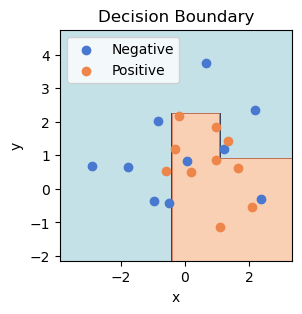

In [12]:
# ÁîüÊàê Bootstrap Ê†∑Êú¨
X_bs, y_bs = bootstrap_samples(X,y)
# ÂàõÂª∫Ê®°ÂûãÂπ∂ËÆ≠ÁªÉ
tree = DecisionTreeClassifier()
tree.fit(X_bs,y_bs)
plot_decision_boundary(X,y,tree)

Âõæ‰∏≠ËßÇÂØüÂà∞**‰ªÖ‰ΩøÁî®‰∏ÄÁªÑBootstrapÊ†∑Êú¨ÔºåÊ®°ÂûãÈ¢ÑÊµãÂ≠òÂú®ÂæàÂ§öËØØÂàÜÁ±ªÊ†∑Êú¨**Ôºå‰∏ãÈù¢ÔºåÊàë‰ª¨Â∞ùËØï‰ΩøÁî®BaggingÂ≠¶‰π†Âô®ÔºåÁõ∏ÂÖ≥ÂèÇÊï∞ÂèØ‰ª•Êü•ÁúãÊñáÊ°£ÔºåËøôÈáå‰∏ªË¶ÅËØ¥Êòé‰∏§‰∏™Ôºö
* `n_estimators`ÔºåÊï¥Êï∞ÔºåÊéßÂà∂Âü∫Â≠¶‰π†Âô®ÁöÑÊï∞Èáè $B$
* `n_jobs`ÔºåÊï¥Êï∞ÔºåÊéßÂà∂BaggingÂü∫Â≠¶‰π†Âô®ËÆ≠ÁªÉÁöÑÂπ∂Ë°åËøõÁ®ãÊï∞ÈáèÔºåÊúÄÂ§ß‰∏çË∂ÖËøáÂΩìÂâçËÆ°ÁÆóÊú∫CPUÁöÑÊ†∏ÂøÉÊï∞Ôºå**ËÆæÁΩÆ‰∏∫**`-1`**Ë°®Á§∫‰ΩøÁî®ÊâÄÊúâÊ†∏ÂøÉÂπ∂Ë°å**

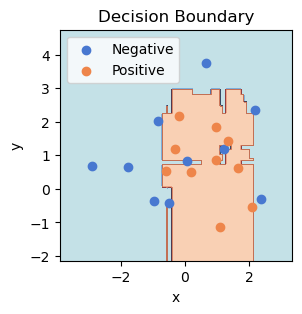

In [13]:
# ÂàõÂª∫BaggingÂ≠¶‰π†Âô®
bag_tree = BaggingClassifier(tree,n_estimators=50,n_jobs=-1)
# Áõ¥Êé•Êèê‰æõÂéüËÆ≠ÁªÉÊï∞ÊçÆÔºåBaggingClassifier‰ºöËá™Âä®BootstrapÈááÊ†∑
bag_tree.fit(X,y)
plot_decision_boundary(X,y,bag_tree)

ÊïàÊûúÁ´ãÁ´øËßÅÂΩ±ÔºåBaggingÂ≠¶‰π†Âô®ÂÆåÊàê‰∫ÜÂá†‰πéÊâÄÊúâÊ†∑Êú¨ÁöÑÊ≠£Á°ÆÂàÜÁ±ª

Áî±‰∫éBaggingÊñπÊ≥ïÈùûÂ∏∏ÁÆÄÂçïÔºåÊàë‰ª¨‰πüÂèØ‰ª•Ëá™Â∑±ÁºñÂÜôBaggingÊ®°Âûã`MyBaggingClassifier`

In [14]:
class MyBaggingClassifier:
    def __init__(self, estimator, B : int):
        """
        Parameters
        ----------
        estimator : Any
            Âü∫Â≠¶‰π†Âô®ÁÆóÊ≥ï
        B : int
            Âü∫Â≠¶‰π†Âô®‰∏™Êï∞
        """
        self.estimator = estimator
        self.B = B
        self.base_estimators = []
    
    def fit(self, X : np.ndarray, y : np.ndarray):
        """
        ËÆ≠ÁªÉBaggingÊ®°Âûã
        """
        for b in range(self.B):
            # ÁîüÊàê Bootstrap Ê†∑Êú¨
            X_bs, y_bs = bootstrap_samples(X,y)
            # Êã∑Ë¥ùÊ®°ÂûãÔºåËøõË°åËÆ≠ÁªÉ
            model = deepcopy(self.estimator)
            model.fit(X_bs,y_bs)
            # Ê∑ªÂä†Âà∞Âü∫Â≠¶‰π†Âô®ÂàóË°®
            self.base_estimators.append(model)
    
    def predict(self, X : np.ndarray):
        """
        ËøõË°åÈ¢ÑÊµã
        """
        # È¶ñÂÖàÊØè‰∏™Âü∫Â≠¶‰π†Âô®ËøõË°åÈ¢ÑÊµã
        x_preds = []
        for model in self.base_estimators:
            x_preds.append(model.predict(X))
        x_preds = np.array(x_preds)
        
        # Áî®‰ºóÊï∞ÊäïÁ•®Ê±áÊÄª
        preds = []
        for i in range(X.shape[0]):
            preds.append(Counter(x_preds[:,i]).most_common()[0][0])
        return np.array(preds)

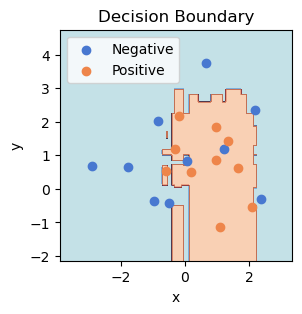

In [15]:
# ÂàõÂª∫BaggingÂ≠¶‰π†Âô®
my_bag_tree = MyBaggingClassifier(tree,B=20)
# Áõ¥Êé•Êèê‰æõÂéüËÆ≠ÁªÉÊï∞ÊçÆÔºåBaggingClassifier‰ºöËá™Âä®BootstrapÈááÊ†∑
my_bag_tree.fit(X,y)
plot_decision_boundary(X,y,my_bag_tree)

----

## **2 ÈöèÊú∫Ê£ÆÊûó**

### **2.1ÈöèÊú∫Ê£ÆÊûóÊ®°Âûã**

**ÈöèÊú∫Ê£ÆÊûó**Ôºà**Random Forest**ÔºåÁÆÄÁß∞**RF**ÔºâÊòØÂü∫‰∫éÂÜ≥Á≠ñÊ†ëÁöÑBaggingÊ®°ÂûãÔºåÁî±‰∫éÂü∫Â≠¶‰π†Âô®ÊòØÂÜ≥Á≠ñÊ†ëÔºåËá™ÁÑ∂Âú∞‰∫∫‰ª¨ÂΩ¢Ë±°Âú∞Â∞ÜBaggingÂÜ≥Á≠ñÊ†ëÁß∞‰∏∫ÈöèÊú∫Ê£ÆÊûó

ÈöèÊú∫Ê£ÆÊûóÂú®BaggingÊ®°ÂûãÂü∫Á°Ä‰∏äÔºåËøòÊ†πÊçÆÂÜ≥Á≠ñÊ†ëÁöÑÁâπÁÇπÔºåÈ¢ùÂ§ñÂ¢ûÂä†‰∫Ü‰∏Ä‰∫õÁâπÊÄßÔºåËøõ‰∏ÄÊ≠•**Èôç‰ΩéÊ®°ÂûãÊñπÂ∑Æ**

ÈöèÊú∫Ê£ÆÊûóÁöÑÈöèÊú∫‰ΩìÁé∞Âú®‰∏§‰∏™ÊñπÈù¢Ôºö
* **ÈááÊ†∑ÈöèÊú∫ÊÄß**
* **ÁâπÂæÅÈÄâÊã©ÁöÑÈöèÊú∫ÊÄß**

ÈöèÊú∫Ê£ÆÊûóÁÆóÊ≥ïÁöÑÂ§ßËá¥ÊµÅÁ®ãÂ¶Ç‰∏ãÔºåÂü∫Â≠¶‰π†Âô®‰ΩøÁî®CARTÂÜ≥Á≠ñÊ†ëÔºö
* ÂÅáËÆæÊúâ $N$ ‰∏™Ê†∑Êú¨ÔºåÂØπÁ¨¨ $b$ Ê£µÊ†ëÔºå‰ªéÊ†∑Êú¨‰∏≠ÊäΩÂèñ $N$ ‰∏™Ê†∑Êú¨
* ÂÅáËÆæÊØè‰∏™Ê†∑Êú¨Êúâ $p$ ‰∏™ÁâπÂæÅÔºåÂú®ÂÜ≥Á≠ñÊ†ëÁöÑÊØè‰∏™ÁªìÁÇπÂ§ÑÔºö
    * ÈöèÂç≥‰ªéËøô $p$ ‰∏™ÁâπÂæÅ‰∏≠ÈÄâÊã©Âá∫ $q$ ‰∏™ÔºåÊª°Ë∂≥ $q < p$
    * Âà©Áî®ÈöèÊú∫ÈÄâÊã©Âá∫ÁöÑ $q$ ‰∏™ÁâπÂæÅÊêúÁ¥¢ÂàÜË£ÇÁâπÂæÅÂíåÂàáÂàÜÁÇπ
    * Áõ¥Âà∞Á¨¨ $b$ Ê£µÂÜ≥Á≠ñÊ†ëÁîüÊàêÂÆåÊØï
* ÈáçÂ§ç‰∏äËø∞Ê≠•È™§ÂÖ± $B$ Ê¨°ÔºåÂæóÂà∞ $B$ Ê£µÂÜ≥Á≠ñÊ†ë
* Â∞ÜÂü∫ÂÜ≥Á≠ñÊ†ëÁî®BaggingÁöÑÊñπÊ≥ïÈõÜÊàêÔºåÂõûÂΩíÈóÆÈ¢òÈááÁî®Âπ≥ÂùáÈ¢ÑÊµãÔºåÂàÜÁ±ªÈóÆÈ¢òÊäïÁ•®Êú∫Âà∂

‰∫ãÂÆû‰∏äÔºå**‰∏äÈù¢ÊµÅÁ®ã‰∏≠ÁöÑÈöèÊú∫ÊÄßÈÄâÊã©ÁâπÂæÅ**ÔºåÂç≥‰∏∫**‰∏ä‰∏ÄÁ´†‰∏≠Êàë‰ª¨‰ªãÁªçÁöÑÂÜ≥Á≠ñÊ†ëÁöÑ**`max_features`**ÂèÇÊï∞**

ÈöèÊú∫Ê£ÆÊûóÂÖ∑ÊúâÂíåBaggingÁõ∏ÂêåÁöÑÁâπÁÇπÔºåÂç≥ÂèØ‰ª•ÂÅö**ÂåÖÂ§ñ‰º∞ËÆ°**

### **2.2 ÁâπÂæÅÈáçË¶ÅÊÄß**

Êó¢ÁÑ∂ÊòØÂü∫‰∫éÂÜ≥Á≠ñÊ†ëÔºåÈÇ£‰πàÈöèÊú∫Ê£ÆÊûóËá™ÁÑ∂‰πüÂèØ‰ª•ËÄÉËôëÁâπÂæÅÈáçË¶ÅÊÄß

Âú®ÂÜ≥Á≠ñÊ†ë‰∏≠ÔºåÊàë‰ª¨‰ªãÁªç‰∫Ü‰∏§ÁßçÂÜ≥Á≠ñÊ†ëÁöÑÁâπÂæÅÈáçË¶ÅÊÄßËÆ°ÁÆóÊñπÊ≥ïÔºå‰∏ÄÁßçÊòØÁªüËÆ°ÊØè‰∏™ÁâπÂæÅÁî®‰∫éÂàÜË£ÇÁªìÁÇπÁöÑÊ¨°Êï∞Ôºå‰∏ÄÁßçÊòØËÆ°ÁÆóGiniÂ¢ûÁõäÔºå‰πüÊàê‰∏∫GiniÁâπÂæÅÈáçË¶ÅÊÄß

Ëøô‰∏§ÁßçÁâπÂæÅÈáçË¶ÅÊÄßÁöÑÂ•ΩÂ§ÑÊòØÔºåÂú®**Ê†ëÁöÑÂàÜË£ÇËøáÁ®ã‰∏≠Â∞±ÂèØ‰ª•ËøõË°åÁªüËÆ°ÔºåÂú®ÂÜ≥Á≠ñÊ†ëÁîüÊàêÂêéÔºåÁâπÂæÅÈáçË¶ÅÊÄß‰πüËÆ°ÁÆóÂÆåÊØï‰∫Ü**

Ëøô‰∏§ÁßçÁâπÂæÅÈáçË¶ÅÊÄßÂèØ‰ª•Áõ¥Êé•È°∫Âª∂Âà∞ÈöèÊú∫Ê£ÆÊûóÔºåÂÅáËÆæ $\text{FI}_b(j)$ Ë°®Á§∫Á¨¨ $b$ Ê£µÂÜ≥Á≠ñÊ†ëÂÖ≥‰∫éÁâπÂæÅ $j$ ÁöÑÁâπÂæÅÈáçË¶ÅÊÄßÔºåÂàôÈöèÊú∫Ê£ÆÊûóÁöÑÁâπÂæÅÈáçË¶ÅÊÄßÔºåÂèØ‰ª•Áõ¥Êé•ËÄÉËôëËÅöÂêàÊâÄÊúâÂü∫Â≠¶‰π†Âô®ÁöÑÂùáÂÄºÔºö

$$
\text{FI}(j) = \frac{1}{B}\sum_{b=1}^{B}\text{FI}_b(j),\quad j=1,\cdots,p
$$

Êàë‰ª¨‰∏ãÈù¢Ë¶Å‰ªãÁªçÂè¶‰∏ÄÁßçÁâπÂæÅÈáçË¶ÅÊÄßÁöÑËÆ°ÁÆóÊñπÊ≥ïÔºåÁß∞‰∏∫**ÁΩÆÊç¢ÁâπÂæÅÈáçË¶ÅÊÄß**

‰∏ÄÁßçÁõ¥ËßâÊòØÔºå**Â¶ÇÊûúÊüê‰∏™ÁâπÂæÅ** $j$ **ÂØπÈ¢ÑÊµãÂæàÈáçË¶Å**Ôºå**ÈÇ£‰πàÂΩìÊàë‰ª¨ÈöèÊú∫Êâì‰π±ÁâπÂæÅ** $j$ **Âêé**Ôºå**Ê®°ÂûãÁöÑÊÄßËÉΩ‰ºöÂ§ßÊâìÊäòÊâ£**

ÂÅáËÆæÊï∞ÊçÆÈõÜÊòØ $T$ÔºåÊ†áÁ≠æ‰∏∫ $Y$ÔºåÊ†∑Êú¨Èáè‰∏∫ $N$ÔºåËØÑ‰º∞ÂáΩÊï∞ÊòØ $M(Y,f(T))$Ôºå**ÂÅáËÆæ** $M(Y,f(T))$ **Ë∂äÈ´òË∂äÂ•Ω**Ôºà‰æãÂ¶ÇÂáÜÁ°ÆÁéáÔºâÔºåÂàôÂØπÁâπÂæÅ $j$ÔºåÂÅáËÆæ $f(x_i)$ Ë°®Á§∫Ê®°ÂûãÂØπ‰∫éÊ†∑Êú¨ $x_i$ ÁöÑÈ¢ÑÊµãÔºå$\pi_j$ Ë°®Á§∫‰∏Ä‰∏™Â§ßÂ∞è‰∏∫ $N$ ÊéíÂàóÔºå$T_{\pi_j}$ Ë°®Á§∫Â∞ÜÊï∞ÊçÆ‰∏≠ÁöÑÁ¨¨ $j$ ÂàóÁâπÂæÅÊåâÁÖßÊéíÂàó $\pi_j$ ÊõøÊç¢È°∫Â∫èÔºåÂàô $f(x_{i,\pi_j})$ Ë°®Á§∫ÁªèËøáÊéíÂàó $\pi_j$ ÊõøÊç¢ÂêéÊ®°ÂûãÂØπÊ†∑Êú¨ $x_i$ ÁöÑÈ¢ÑÊµãÔºåÂÖ∑‰ΩìÂú∞Ôºö

$$
x_{i,\pi_j} = \left( x_{i,1},\cdots,x_{i,j-1},x_{\pi_j(i),j},x_{i,j+1},\cdots,x_p \right)
$$

Âõ†Ê≠§ÔºåÂØπÁ¨¨ $b$ ‰∏™Âü∫Â≠¶‰π†Âô®ÔºåÁâπÂæÅÈáçË¶ÅÊÄß $\text{FI}_b(j)$ Ë°®Á§∫‰∏∫Ôºö

$$
\text{FI}_b(j) = M(Y,f(T)) - M(Y,f(T_{\pi_j})),\quad j=1,\cdots,p,\quad b=1,\cdots,B
$$

$\text{FI}_b(j)$ Ë°®Á§∫Êâì‰π±ÁâπÂæÅ $j$ ÂêéÔºåÊ®°ÂûãÊÄßËÉΩÁöÑ‰∏ãÈôçÁ®ãÂ∫¶

ÊúÄÁªàÁöÑÁâπÂæÅÈáçË¶ÅÊÄßÂèØ‰ª•ÂÆö‰πâ‰∏∫Ôºö

$$
\text{FI}(j) = \frac{1}{B}\sum_{b=1}^{B} \text{FI}_b(j),\quad j=1,\cdots,p
$$

ÂΩìÁÑ∂Ôºå‰∏éÂÖ∂‰ªñÁâπÂæÅÈáçË¶ÅÊÄß‰∏ÄÊ†∑ÔºåÂèØ‰ª•Â∞Ü‰∏äÂºèËøõË°åÊ†áÂáÜÂåñÔºåËÆ©ÁâπÂæÅÈáçË¶ÅÊÄßÁöÑÈáèÁ∫≤Êõ¥ÂÖ∑ÊúâÊØîËæÉÊÄß

### **2.3 ÈöèÊú∫Ê£ÆÊûó‰∏éBagging**

Êàë‰ª¨Êù•ËøõË°å‰∏Ä‰∏™ÁÆÄÂçïÁöÑÂÆûÈ™å**ÂØπÊØîBagging**Âíå**RF**ÔºåÂØºÂÖ•`glass`Êï∞ÊçÆÈõÜ

In [16]:
from sklearn.datasets import fetch_openml
X,y = fetch_openml(name="glass",return_X_y=True,version=1,parser="auto")

In [17]:
print("Êï∞ÊçÆÈõÜÁª¥Â∫¶Ôºö",X.shape)
print("Á±ªÂà´Êï∞ÈáèÔºö",len(np.unique(y)))

Êï∞ÊçÆÈõÜÁª¥Â∫¶Ôºö (214, 9)
Á±ªÂà´Êï∞ÈáèÔºö 6


Êï∞ÊçÆÈõÜÁî±ÁéªÁíÉÁöÑ`9`ÁßçÂåñÂ≠¶ÂÖÉÁ¥†Âê´ÈáèÊûÑÊàêÔºåÂÖ±Êúâ`6`Áßç‰∏çÂêåÁöÑÁéªÁíÉÁ±ªÂûãÔºåÊï∞ÊçÆÊ†∑Êú¨Èáè‰∏∫`214`

In [18]:
X.head()

RI     Na    Mg    Al     Si     K     Ca   Ba    Fe
0  1.51793  12.79  3.50  1.12  73.03  0.64   8.77  0.0  0.00
1  1.51643  12.16  3.52  1.35  72.89  0.57   8.53  0.0  0.00
2  1.51793  13.21  3.48  1.41  72.64  0.59   8.43  0.0  0.00
3  1.51299  14.40  1.74  1.54  74.55  0.00   7.59  0.0  0.00
4  1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.0  0.24

Êé•‰∏ãÊù•ÔºåÊàë‰ª¨ÂàõÂª∫**Bagging**ÂàÜÁ±ªÂô®Âíå**ÈöèÊú∫Ê£ÆÊûó**ÂàÜÁ±ªÂô®ÔºåÂπ∂‰∏çÊñ≠ÊèêÈ´òÂÆÉ‰ª¨ÁöÑÂü∫Â≠¶‰π†Âô®Êï∞ÈáèÔºåËßÇÂØüÂÆÉ‰ª¨Âú®**ÊµãËØïÈõÜ**‰∏äÁöÑË°®Áé∞

In [19]:
bag_acc, rf_acc = [], []
num_of_estimators = []
for b in tqdm(range(1,1000,10)):
    num_of_estimators.append(b)
    # ÂàáÂàÜÊï∞ÊçÆÈõÜ
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
    
    # ÂàõÂª∫BaggingÊ®°ÂûãÔºåËÆ≠ÁªÉÂπ∂ËØÑ‰º∞
    tree = DecisionTreeClassifier()
    bag_model = BaggingClassifier(tree,n_estimators=b)
    bag_model.fit(X_train,y_train)
    bag_acc.append(1 - accuracy_score(y_test,bag_model.predict(X_test)))
    
    # ÂàõÂª∫RFÊ®°ÂûãÔºåËÆ≠ÁªÉÂπ∂È¢ÑÊµã
    rf_model = RandomForestClassifier(n_estimators=b)
    rf_model.fit(X_train,y_train)
    rf_acc.append(1 - accuracy_score(y_test,rf_model.predict(X_test)))

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [03:38<00:00,  2.18s/it]


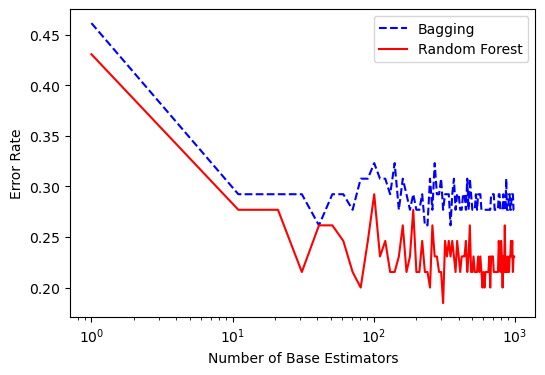

In [20]:
fig = plt.figure(figsize=(6,4))
plt.semilogx(num_of_estimators,bag_acc,label="Bagging",color="blue",ls="--")
plt.semilogx(num_of_estimators,rf_acc,label="Random Forest",color="red")
plt.xlabel("Number of Base Estimators")
plt.ylabel("Error Rate")
plt.legend()

Amazingüòç,ÂÆûÈ™åË°®Êòé**ÈöèÊú∫Ê£ÆÊûóÂú®ÊµãËØïÈõÜ‰∏äÁöÑËØØÂ∑ÆË¶ÅÂ∞è‰∫éÂü∫Á°ÄÁöÑBagging**,ËØ¥ÊòéÈöèÊú∫Ê£ÆÊûóÊúâÊõ¥‰ºòÁßÄÁöÑ**Ê≥õÂåñËÉΩÂäõ**

Êàë‰ª¨‰∏ÄËµ∑Êù•ÂàÜÊûê‰ª•‰∏ã‰∫ßÁîüËøô‰∏™Áé∞Ë±°ÁöÑÂéüÂõ†

ÂÅáËÆæÈöèÊú∫ÂèòÈáè $X_1,X_2,\cdots,X_B$ Áã¨Á´ãÂêåÂàÜÂ∏É‰∫é $N(\mu,\sigma^2)$, ÂàôÊúâ:

$$
var\left(\frac{1}{B}\sum_{i=1}^{B}X_i \right) = \frac{1}{B}\sigma^2
$$

ËÄåÂ¶ÇÊûúÊîæÊùæÈÉ®ÂàÜÂÅáËÆæ,$X_1,\cdots,X_B$ **Âè™ÊòØÂêåÂàÜÂ∏É**, **‰∏§‰∏§‰πãÈó¥ÁöÑÁõ∏ÂÖ≥Á≥ªÊï∞**‰∏∫ $\rho$, ÂàôÊúâ:

$$
var\left( \frac{1}{B}\sum_{i=1}^{B}X_i \right) = \rho\sigma^2 + \frac{1-\rho}{B}\sigma^2
$$

ÊòæÁÑ∂, ÊàêÁ´ãÂ¶Ç‰∏ãÂºèÂ≠ê:

$$
\frac{1}{B}\sigma^2 < \rho\sigma^2 + \frac{1-\rho}{B}\sigma^2, \quad B>1
$$

‰∏äÂºèÊÑèÂë≥ÁùÄ, ÊñπÂ∑Æ $\sigma^2/B$ Âè™ÊòØÂú®Áã¨Á´ãÂêåÂàÜÂ∏ÉÊó∂ÁöÑÁêÜËÆ∫‰∏ãÁïå, **ÂΩìÂèòÈáèÈó¥Â≠òÂú®Áõ∏ÂÖ≥ÊÄßÊó∂, ÊñπÂ∑Æ‰ºöÂÅèÂ§ß**

ÂØπ‰∫éÊüê‰∏™Êï∞ÊçÆÁÇπ $x_0$, BaggingÁöÑÈ¢ÑÊµãÁªìÊûú‰∏∫:

$$
f_{\text{bag}}(x_0) = \frac{1}{B}\sum_{b=1}^{B} \hat{f}(x_0;T^{(b)})
$$

Âõ†‰∏∫BaggingÂú®‰ΩøÁî®BootstrapÊûÑÈÄ† $T^{(b)}$ Êó∂‰ºöÊúâÈáçÂ§çÊ†∑Êú¨,Âõ†Ê≠§ $\hat{f}(x_0;T^{(b)})$ ‰πãÈó¥‰ºöÂ≠òÂú®Áõ∏ÂÖ≥ÊÄß, ÂÅáËÆæ‰∏∫ $\rho$, Âàô:

$$
var(f_{\text{bag}}(x_0)) = \rho\sigma^2 + \frac{1 - \rho}{B}\sigma^2
$$

* ‰∏äÂºè‰∏≠, **Á¨¨‰∏ÄÈ°π‰∏é** $B$ **Êó†ÂÖ≥**, Âè™‰∏éÈáçÂ§çÊäΩÊ†∑ÁöÑ**Êï∞ÊçÆÈõÜ**ÊúâÂÖ≥
* **Á¨¨‰∫åÈ°πÂèØ‰ª•ÈÄöËøáÂ¢ûÂ§ß** $B$ **ÈÄêÊ∏êÂáèÂ∞è**

Âõ†Ê≠§,ÊèêÂçáBaggingÊñπÊ≥ï, **ÁªßÁª≠Èôç‰ΩéÊñπÂ∑ÆÁöÑÂè¶‰∏ÄÁßçÊñπÊ≥ïÊòØÂáèÂº±ÊâÄÊûÑÈÄ†Âü∫Â≠¶‰π†Âô®‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄß**

ËÄåÈöèÊú∫Ê£ÆÊûóÈÄöËøá**ÊûÑÈÄ†ÂÜ≥Á≠ñÊ†ëÊó∂‰ΩøÁî®ÈöèÊú∫ÈááÊ†∑Ê†∑Êú¨ÂíåÈöèÊú∫ÈááÊ†∑ÁâπÂæÅ**ÁöÑÊâãÊÆµ, ËææÂà∞**Èôç‰Ωé‰∏çÂêåÂü∫ÂÜ≥Á≠ñÊ†ë‰πãÈó¥Áõ∏ÂÖ≥ÊÄßÁöÑÁõÆÁöÑ**

‰ªéËÄå, **ÈöèÊú∫Ê£ÆÊûóÊØîÈÄöÂ∏∏ÁöÑBaggingÊïàÊûúÊõ¥Â•Ω**, ‰∏äËø∞ËÆ®ËÆ∫‰∏éÊàë‰ª¨Âú®Êú¨ËäÇ‰∏ÄÂºÄÂßãÁöÑÂÆûÈ™åÁªìÊûúÂÆåÂÖ®ÂêªÂêà. 

ÊúÄÂêéÔºåÊàë‰ª¨Â±ïÁ§∫ÈöèÊú∫Ê£ÆÊûóÁöÑ**ÁâπÂæÅÈáçË¶ÅÊÄß**

Text(0, 0.5, 'Feature')

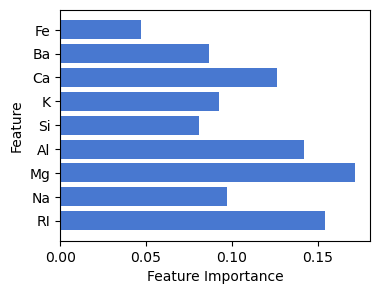

In [21]:
model = RandomForestClassifier()
model.fit(X,y)
FI = model.feature_importances_
fig = plt.figure(figsize=(4,3))
plt.barh(model.feature_names_in_,model.feature_importances_,color=colors[0])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")

### **2.4 ÈöèÊú∫Ê£ÆÊûóÊÄªÁªì**

Êàë‰ª¨ÁÆÄÂçïÊÄªÁªì‰∏Ä‰∏ã‰Ωú‰∏∫ÊúÄÂº∫Â§ßÁöÑ‰∏ÄÁ±ªBaggingÊ®°ÂûãÁöÑ**ÈöèÊú∫Ê£ÆÊûóÁöÑ‰ºòÁÇπ**Ôºö
* **ËÉΩÂ§üÈôç‰ΩéÂºÇÂ∏∏Ê†∑Êú¨Â∏¶Êù•ÁöÑÂΩ±Âìç**ÔºöÁî±‰∫éÂØπÊ†∑Êú¨ÁªßÁª≠‰∫ÜÈöèÊú∫ÈááÊ†∑Âª∫Á´ãÂ§ö‰∏™Âü∫Â≠¶‰π†Âô®ÔºåÂºÇÂ∏∏Ê†∑Êú¨ÂíåÊûÅÁ´ØÊ†∑Êú¨Âú®ÊúÄÁªàÈ¢ÑÊµãÁöÑË¥°ÁåÆË¢´Èôç‰Ωé‰∫ÜÔºåBaggingÊ®°ÂûãÈÄöËøáÂèÇËÄÉÂ§ö‰∏™Âü∫Â≠¶‰π†Âô®ÁöÑÁªìÊûúÔºåËÉΩÂ§üÂæàÂ•ΩÂú∞ÈÅøÂÖçÂèóÂà∞ÂºÇÂ∏∏ÂÄºÁöÑÂΩ±Âìç
* **Èôç‰ΩéÊ≥õÂåñËØØÂ∑ÆÔºåÂáèÂ∞ëËøáÊãüÂêà**Ôºö‰∏ä‰∏ÄËäÇÊèêÂà∞Ôºå‰ΩøÁî®ÂÜ≥Á≠ñÊ†ëÂæàÂ§ßÁöÑ‰∏Ä‰∏™ÈóÆÈ¢òÊòØ**Ê®°ÂûãÈùûÂ∏∏ÂÆπÊòìËøáÊãüÂêà**ÔºåÁé∞Âú®ÈöèÊú∫Ê£ÆÊûóÂÄüÂä©**Ê†∑Êú¨ÈöèÊú∫ÈááÊ†∑**Âíå**ÁâπÂæÅÈöèÊú∫ÈááÊ†∑**ÁöÑÊäÄÊúØÔºåÁâπÂæÅÂíåÊï∞ÊçÆÂú®Âçï‰∏™ÂÜ≥Á≠ñÊ†ë‰∏äÂèòÂ∞ë‰∫ÜÔºåÈôç‰Ωé‰∫ÜËøáÊãüÂêàÁöÑÂèØËÉΩÊÄßÔºå‰∏îÁõ∏ÊØî‰∏ÄËà¨ÁöÑBaggingÔºåÁâπÂæÅÈöèÊú∫ÂåñÈááÊ†∑Èôç‰Ωé‰∫ÜÂü∫Â≠¶‰π†Âô®È¢ÑÊµã‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄßÔºåËøõ‰∏ÄÊ≠•Èôç‰ΩéÊ®°ÂûãÊñπÂ∑Æ
* **Êòì‰∫éÂ§ÑÁêÜÈ´òÁª¥Â∫¶Êï∞ÊçÆ**ÔºöÂÜ≥Á≠ñÊ†ëÂú®Èù¢ÂØπÈ´òÁª¥Â∫¶Êï∞ÊçÆÔºà$p$ÈùûÂ∏∏Â§ßÔºâÊó∂Ôºå‰∏ÄÊñπÈù¢ÂÆπÊòìÂá∫Áé∞ËøáÊãüÂêàÔºå‰∏ÄÊñπÈù¢ÊØèÊ¨°ÁâπÂæÅÂàÜË£ÇÁöÑÊêúÁ¥¢ÈÉΩÈúÄË¶ÅÂ§ßÈáèÁöÑÈÅçÂéÜÔºåËÆ°ÁÆóÂ§çÊùÇÂ∫¶‰∏é $\mathcal{O}(p)$ ÊàêÊ≠£ÊØîÔºåÁé∞Âú®ÈöèÊú∫Ê£ÆÊûóÊØèÊ¨°Âè™ÈááÊ†∑ÈÉ®ÂàÜÁâπÂæÅÔºåËÆ°ÁÆóÂ§çÊùÇÂ∫¶Â§ßÂ§ßÈôç‰ΩéÔºåÂè™ÈúÄË¶ÅÂ¢ûÂä†Âü∫Â≠¶‰π†Âô®Êï∞Èáè $B$ÔºåÂ∞±ËÉΩÂ§üËé∑ÂæóÂæàÂ•ΩÁöÑÊïàÊûú
* **ÂÖ∑ÊúâBaggingÁ±ªÊñπÊ≥ïÂÖ±ÂêåÁöÑ‰ºòÁÇπÔºöÂèØÂπ∂Ë°å„ÄÅËÉΩËøõË°åÂåÖÂ§ñ‰º∞ËÆ°**

----

## **ÁªÉ‰π†**

1. ÁÜüÊÇâ`sklearn`‰∏≠`RandomForestClassifier()`Âíå`RandomForestRegressor()`ÁöÑÊñπÊ≥ïÂèÇÊï∞ÔºåÊòéÁôΩÊØè‰∏™ÂèÇÊï∞ÊâÄËµ∑Âà∞ÁöÑ‰ΩúÁî®ÔºåÁêÜËß£ÊØè‰∏™ÂèÇÊï∞Âú®ÁÆóÊ≥ïÁöÑÂì™‰∏™ÈÉ®ÂàÜËµ∑‰ΩúÁî®

2. ‰ΩøÁî®ÈöèÊú∫Ê£ÆÊûóÂØπ2.3ËäÇÁöÑ`glass`Êï∞ÊçÆÈõÜÂª∫Ê®°ÔºåÂ∞ÜÊï∞ÊçÆÈõÜÂàáÂàÜ‰∏∫ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÔºåÂú®ËÆ≠ÁªÉÊó∂‰ΩøÁî®ÂåÖÂ§ñ‰º∞ËÆ°ÔºåÂØπÊØîÂåÖÂ§ñ‰º∞ËÆ°ÁöÑÊÄßËÉΩÂíåÊ®°ÂûãÂú®ÊµãËØïÈõÜ‰∏äÊÄßËÉΩ

----